In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [105]:
data = pd.read_csv('cleandata.txt', sep = '\t')
data.index = pd.to_datetime(data['Date'], format="%Y%m%d", inplace=False)


TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [81]:
sid = SentimentIntensityAnalyzer()
data['Vader'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [103]:
monthly_sentiment = data['Vader'].groupby(by='Date').mean()
monthly_sentiment.head()

Date
2018-03-01    0.834550
2018-03-02    0.853319
2018-03-03    0.946183
2018-03-04    0.912218
2018-03-05    0.971818
Name: Vader, dtype: float64

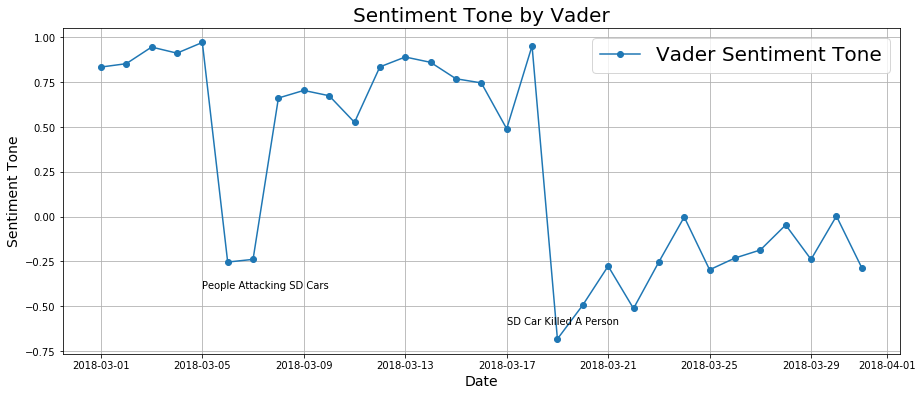

In [104]:
fig, ax = plt.subplots( figsize=(15,6))
ax.plot(monthly_sentiment, marker='o')


ax.set_ylabel('Sentiment Tone', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_title('Sentiment Tone by Vader', fontsize=20)
ax.legend(["Vader Sentiment Tone"], fontsize=20)
ax.text(monthly_data.index[4],-0.4,'People Attacking SD Cars')
ax.text(monthly_data.index[16],-0.6,'SD Car Killed A Person')
ax.grid()
plt.savefig("vader_Tone_March2018.png")